In [220]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import time
import pandas_profiling as pp
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNetCV

#### MCYT =machine cycle time, MMin = Min main memory, MMax = Max main memory, CACH =Cache memory, CHMin = Min channels, CHMax = Max Channels, PRP =published relative performance, Score = Estimated Relative Performance

In [221]:
names = ['Vendor','Model_Name','MYCT', 'MMin', 'MMax', 'CACH', 'CHMin', 'CHMax', 'PRP', 'Score' ];
df = pd.read_csv('C:/Users/damps/Documents/machine.data',names=names)
df.head()

,Vendor,Model_Name,MYCT,MMin,MMax,CACH,CHMin,CHMax,PRP,Score
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


#### Sorting out the structure of the data in terms of categorical cf numerical

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Vendor      209 non-null    object
 1   Model_Name  209 non-null    object
 2   MYCT        209 non-null    int64 
 3   MMin        209 non-null    int64 
 4   MMax        209 non-null    int64 
 5   CACH        209 non-null    int64 
 6   CHMin       209 non-null    int64 
 7   CHMax       209 non-null    int64 
 8   PRP         209 non-null    int64 
 9   Score       209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [223]:
categorical = df.iloc[:,:2]
numerical = df.iloc[:,2:]

### Score is the Target Variable. All the others are predictors

In [224]:
X = numerical.iloc[:,:-1]
y = numerical.iloc[:,-1]

In [225]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MYCT    209 non-null    int64
 1   MMin    209 non-null    int64
 2   MMax    209 non-null    int64
 3   CACH    209 non-null    int64
 4   CHMin   209 non-null    int64
 5   CHMax   209 non-null    int64
 6   PRP     209 non-null    int64
dtypes: int64(7)
memory usage: 11.6 KB


In [226]:
y.head()

0    199
1    253
2    253
3    253
4    132
Name: Score, dtype: int64

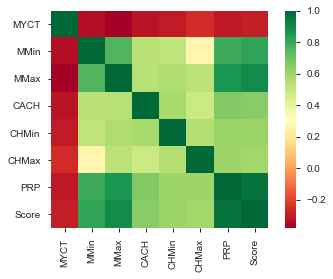

In [227]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
random_state=42,
shuffle=True)

### Scale and transform data before

In [229]:
scaler = StandardScaler()
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.values.reshape(-1, 1)
y_test  = y_test.values.reshape(-1, 1)
y_scaler = StandardScaler()
# Fit on training set only.
y_scaler.fit(y_train)
# Apply transform to both the training set and the test set.
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [230]:
model = linear_model.LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
model_score = model.score(X_train,y_train)
print('coefficient of determination R^2 of the prediction.:',model_score)
y_predicted = model.predict(X_test)
print("Mean squared error: %.3f"% mean_squared_error(y_test, y_predicted))
print('Test Variance score: %.3f' % r2_score(y_test, y_predicted))

coefficient of determination R^2 of the prediction.: 0.9557654987056478
Mean squared error: 0.670
Test Variance score: 0.895


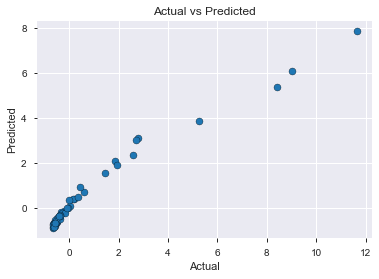

In [232]:
##Plotting the predicted compared to actual 
from sklearn.model_selection import cross_val_predict
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [233]:
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])
kf = KFold(shuffle=True, random_state=42, n_splits=4)
pf = PolynomialFeatures(degree=2)

In [234]:
predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)

0.903719380447445

In [235]:
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])
kf = KFold(shuffle=True, random_state=42, n_splits=4)

In [236]:
predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)

0.903719380447445

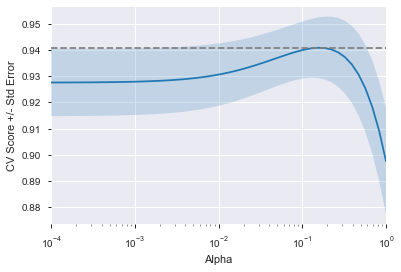

In [270]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=4)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

In [297]:
best_estimator1 = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("Linear_regression", lr)])

best_estimator1.fit(X, y)
best_estimator1.score(X, y)

0.9995859048654581

In [298]:
best_estimator1.named_steps["Linear_regression"].coef_

array([-1.90516358e+13, -8.06343925e+00,  1.78104756e+01,  4.91405847e+01,
        1.61462489e+01,  5.04693041e+00,  4.08062154e+00, -1.44488843e+00,
        4.20176606e-01, -1.05648795e+00,  1.30382778e+00, -4.23757278e+00,
        3.91231573e+00, -1.98359533e+00, -8.95195548e+00,  2.74535689e+00,
        8.30162917e+00, -2.78811080e+00, -5.08754116e-01,  8.37543926e+00,
        4.79083106e-01,  9.07196006e+00,  7.80012565e+00,  4.26160844e+00,
       -1.91982889e+00, -5.83835499e-01,  2.91805584e+00,  3.17146849e+00,
       -2.99158493e+00,  1.61881976e+00,  1.63374646e+00, -5.95690376e+00,
       -2.61579717e+00,  1.37111273e+00,  1.08122791e+01, -5.08005084e+00])

In [301]:
df_importances = pd.DataFrame(zip(best_estimator1.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator1.named_steps["Linear_regression"].coef_,))

In [302]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [303]:
col_names_dict

{0: 'MYCT', 1: 'MMin', 2: 'MMax', 3: 'CACH', 4: 'CHMin', 5: 'CHMax', 6: 'PRP'}

In [304]:
df_importances.sort_values(by=1, ascending=False).transpose()

,3,2,4,34,21,19,16,22,5,23,...,13,32,17,28,11,35,31,1,14,0
0,x2,x1,x3,x5 x6,x2^2,x1 x5,x1 x2,x2 x3,x4,x2 x4,...,x0 x5,x4 x6,x1 x3,x3 x5,x0 x3,x6^2,x4 x5,x0,x0 x6,1
1,49.140585,17.810476,16.146249,10.812279,9.07196,8.375439,8.301629,7.800126,5.04693,4.261608,...,-1.983595,-2.615797,-2.788111,-2.991585,-4.237573,-5.080051,-5.956904,-8.063439,-8.951955,-19051635769390.472656


In [305]:
df_importances.sort_values(by=1).transpose()

,0,14,1,31,35,11,28,17,32,13,...,23,5,22,16,19,21,34,4,2,3
0,1,x0 x6,x0,x4 x5,x6^2,x0 x3,x3 x5,x1 x3,x4 x6,x0 x5,...,x2 x4,x4,x2 x3,x1 x2,x1 x5,x2^2,x5 x6,x3,x1,x2
1,-19051635769390.472656,-8.951955,-8.063439,-5.956904,-5.080051,-4.237573,-2.991585,-2.788111,-2.615797,-1.983595,...,4.261608,5.04693,7.800126,8.301629,8.375439,9.07196,10.812279,16.146249,17.810476,49.140585


In [240]:
best_estimator.named_steps["Ridge_regression"].coef_

array([ 0.        , -8.86343904, 15.89264581, 45.56575202, 16.50541212,
        3.90971009,  3.49930153,  5.15086106, -0.1391025 , -4.34568043,
       -3.13333215, -4.00621377, -0.90600239, -1.31563575, -0.37301423,
        1.59821399,  6.21184699, -0.51148162,  1.83516997,  4.67456567,
        0.22540867,  8.79127615,  5.57982173,  2.65876155,  1.51129944,
        1.46436365,  3.01670653,  3.13126064, -3.05436912, -0.64488105,
        0.08888099, -1.71760789, -2.68017916,  0.76172957,  6.42562386,
       -1.98451682])

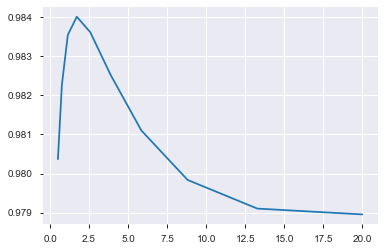

In [238]:
s = StandardScaler()
kf = KFold(shuffle=True, random_state=42, n_splits=4)
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(0.5, 20, 10)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)
    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores);

In [239]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("Ridge_regression", Ridge(alpha=2))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9995751043662426

In [240]:
best_estimator.named_steps["Ridge_regression"].coef_

array([ 0.        , -8.86343904, 15.89264581, 45.56575202, 16.50541212,
        3.90971009,  3.49930153,  5.15086106, -0.1391025 , -4.34568043,
       -3.13333215, -4.00621377, -0.90600239, -1.31563575, -0.37301423,
        1.59821399,  6.21184699, -0.51148162,  1.83516997,  4.67456567,
        0.22540867,  8.79127615,  5.57982173,  2.65876155,  1.51129944,
        1.46436365,  3.01670653,  3.13126064, -3.05436912, -0.64488105,
        0.08888099, -1.71760789, -2.68017916,  0.76172957,  6.42562386,
       -1.98451682])

In [241]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["Ridge_regression"].coef_,))

In [242]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [243]:
col_names_dict

{0: 'MYCT', 1: 'MMin', 2: 'MMax', 3: 'CACH', 4: 'CHMin', 5: 'CHMax', 6: 'PRP'}

In [244]:
df_importances.sort_values(by=1, ascending=False).transpose()

,3,4,2,21,34,16,22,7,19,5,...,12,13,31,35,32,28,10,11,9,1
0,x2,x3,x1,x2^2,x5 x6,x1 x2,x2 x3,x6,x1 x5,x4,...,x0 x4,x0 x5,x4 x5,x6^2,x4 x6,x3 x5,x0 x2,x0 x3,x0 x1,x0
1,45.565752,16.505412,15.892646,8.791276,6.425624,6.211847,5.579822,5.150861,4.674566,3.90971,...,-0.906002,-1.315636,-1.717608,-1.984517,-2.680179,-3.054369,-3.133332,-4.006214,-4.34568,-8.863439


In [245]:
df_importances.sort_values(by=1).transpose()

,1,9,11,10,28,32,35,31,13,12,...,5,19,7,22,16,34,21,2,4,3
0,x0,x0 x1,x0 x3,x0 x2,x3 x5,x4 x6,x6^2,x4 x5,x0 x5,x0 x4,...,x4,x1 x5,x6,x2 x3,x1 x2,x5 x6,x2^2,x1,x3,x2
1,-8.863439,-4.34568,-4.006214,-3.133332,-3.054369,-2.680179,-1.984517,-1.717608,-1.315636,-0.906002,...,3.90971,4.674566,5.150861,5.579822,6.211847,6.425624,8.791276,15.892646,16.505412,45.565752


In [289]:
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("elastic_regression", ElasticNetCV())])

best_estimator.fit(X, y)
best_estimator.score(X, y)

C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9857377569069483

In [283]:
lasso_coef = Lasso(alpha=0.01).fit(X, y).coef_

In [266]:
linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

0.8183881014618152


In [267]:
from sklearn.linear_model import RidgeCV
alphas = [0.005, 0.05, 0.1, 0.3, 1, 2, 5, 10, 15, 30, 80]
alpha =[0.01]
ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 0.8694287243772064


In [276]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([ 5e-06, 1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=4).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)

5e-06 0.8183933297675369


C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [281]:

def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNetCV())]

l1_ratios = np.linspace(0.001, 0.9, 20)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e5).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.9 0.8190063780772351


C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\damps\Anaconda3\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [282]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,0.818388
Ridge,0.869429
Lasso,0.818393
ElasticNet,0.819006
